![Pandas Logo](http://pandas.pydata.org/_static/pandas_logo.png)

# <span style="color:blue">Week 08 - Introduction to Pandas </span>

## <span style="color:red">Today's Agenda </span>
- Pandas: Introduction
    - Series
    - DataFrames
    - Indexing, Selecting, Filtering
    - Drop columns
    - Handling missing Data
    
Changed to Python 3 and updated by Gabella, 20190422 <br>
See the original Vanderbilt Computational Workshop at https://github.com/VandyAstroML/Vanderbilt_Computational_Bootcamp <br>
    

In [1]:
# Importing modules
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")  # Seaborn plotting context.

In [2]:
# Pandas version
pd.__version__   # That is a double underscore on the ends, or ignominously called a "dunder".

'0.23.4'

# Series
https://pandas.pydata.org/pandas-docs/stable/reference/series.html <br>
A _Series_ is a one-dimensional array-like object containing an array of data and an associated array of __data labels__.
One can use any NumPy data type to assign to the _Series_

Creating a Series:

In [3]:
series_1 = pd.Series(np.random.random(10))
series_1

0    0.119325
1    0.111033
2    0.311817
3    0.366836
4    0.529049
5    0.398304
6    0.450018
7    0.204418
8    0.241574
9    0.574758
dtype: float64

Panda series is a type...

In [4]:
type(series_1)

pandas.core.series.Series

One can get a NumPy array from the Series, by typing:

In [5]:
series_1.values

array([0.11932523, 0.11103327, 0.31181657, 0.3668364 , 0.52904932,
       0.39830393, 0.45001824, 0.20441769, 0.24157373, 0.57475787])

# Reindexing

One can also get the indices of each element, by typing:

In [6]:
series_1.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

One can also have a custom set of indices:

In [7]:
import string

alphabet = string.ascii_lowercase
alphabet = np.array([x for x in alphabet])[0:10]
alphabet

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='<U1')

In [8]:
series_2 = pd.Series(np.random.random(len(alphabet)), index=alphabet)
series_2

a    0.165495
b    0.060982
c    0.331501
d    0.580113
e    0.756114
f    0.338635
g    0.604514
h    0.501400
i    0.188668
j    0.821679
dtype: float64

One can select only a subsample of the _Series_

In [9]:
series_1[[1,3,4]]

1    0.111033
3    0.366836
4    0.529049
dtype: float64

In [10]:
series_2[['a','d','h']]

a    0.165495
d    0.580113
h    0.501400
dtype: float64

# Arithmetic and function Mapping

You can also perform numerical expressions

In [11]:
series_1[1]**2

0.012328386995696309

Or find values greater than some value '__x__'

In [12]:
x = 0.5
series_1[series_1 >= x]

4    0.529049
9    0.574758
dtype: float64

You can apply functions to a column, and save it as a _new_ Series

In [13]:
import sys
def exponentials(arr, basis=10.):
    """
    Uses the array `arr` as the exponents for `basis`
    
    Parameters
    ----------
    arr: numpy array, list, pandas Series; shape (N,)
        array to be used as exponents of `basis`
    
    power: int or float, optional (default = 10)
        number used as the basis
    
    Returns
    -------
    exp_arr: numpy array or list, shape (N,)
        array of values for `basis`**`arr`
    """
    if isinstance(arr, list):
        exp_arr = [basis**x for x in arr]
        return exp_arr        
    elif isinstance(arr, np.ndarray) or isinstance(arr, pd.core.series.Series):
        exp_arr = basis**arr
        return exp_arr
    else:
        cmd = ">>>> `arr` is not a list nor a numpy array"
        cmd +="\n>>>> Please give the correct type of object"
        print(cmd)
        sys.exit(1)

In [14]:
exponentials(series_1[series_1 >= x])

4    3.381032
9    3.756279
dtype: float64

You can also __create__ a _Series_ using a _dictionary_ (we talked about these on __Week 4__)

In [15]:
labels_arr = ['foo', 'bar', 'baz']
data_arr   = [100, 200, 300]
aalist = list( zip(labels_arr, data_arr) )
print('zip() function is an iterator, can be made a list and looks like:\n{}'.format( aalist ) )
dict_1     = dict(zip(labels_arr, data_arr))
dict_1

zip() function is an iterator, can be made a list and looks like:
[('foo', 100), ('bar', 200), ('baz', 300)]


{'foo': 100, 'bar': 200, 'baz': 300}

In [16]:
series_3 = pd.Series(dict_1)
series_3

foo    100
bar    200
baz    300
dtype: int64

# Handling Missing Data

One of the most useful features of pandas is that it __can handle missing data__ quite easily:

In [17]:
index = ['foo', 'bar', 'baz', 'qux']
series_4 = pd.Series(dict_1, index=index)
series_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

In [18]:
pd.isnull(series_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

In [19]:
pd.isna(series_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

In [20]:
series_3 + series_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

So using a Series is powerful, but __DataFrames__ are probably what gets used the most since it represents a _tabular data structure_ containing an ordered collection of __columns__ and __rows__.

# DataFrames
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


A DataFrame is a "tabular data structure" containing an _ordered collection of columns_. Each column can a have a __different__ data type.

Row and column operations are treated roughly symmetrically.
One can obtain a DataFrame from a normal dictionary, or by reading a file with columns and rows.

Creating a DataFrame

In [21]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'popu' : [5.0, 5.1, 5.2, 4.0, 4.1]}
# data_1 is a dictionary with a label: a list, etc, etc.  So the label becomes the column name and the list values.
print('Type of data_1 is {}.'.format( type(data_1) ) )
df_1 = pd.DataFrame(data_1)
df_1

Type of data_1 is <class 'dict'>.


,state,year,popu
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


This DataFrame has 4 rows and 3 columns by the name "_popu_", "_state_", and "_year_".

The way to __access__ a DataFrame is quite similar to that of accessing a _Series_.<br>
To access a __column__, one writes the name of the `column`, as in the following example:

In [22]:
df_1['popu']

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

In [23]:
df_1.popu

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

In [24]:
print('These columns are NOT numpy arrays though handled similarly in some contexts.')
print('df_1[\'popu\'] is type {}.'.format( type( df_1['popu'] ) ) )
print('You can use the .values to make it a numpy array, type( df_1[\'popu\'].values ) is {}'.
      format( type( df_1['popu'].values ) ))

These columns are NOT numpy arrays though handled similarly in some contexts.
df_1['popu'] is type <class 'pandas.core.series.Series'>.
You can use the .values to make it a numpy array, type( df_1['popu'].values ) is <class 'numpy.ndarray'>


One can also handle __missing data__ with DataFrames.
Like Series, columns that are not present in the data are NaNs:

In [25]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'popu', 'unempl'])
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


In [26]:
df_2['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

One can __retrieve a row__ by:

In [27]:
df_2.ix[1]  # This is deprecated, use .iloc or .loc, as they are more strict.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ix.html

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


year      2013
state       VA
popu       5.1
unempl     NaN
Name: 1, dtype: object

In [28]:
df_2.iloc[1] # https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#indexing-iteration
# iloc is strictly indexing by position.
# loc can access a group of rows by label(s) or boolean array.

year      2013
state       VA
popu       5.1
unempl     NaN
Name: 1, dtype: object

In [29]:
df_2.loc[1]

year      2013
state       VA
popu       5.1
unempl     NaN
Name: 1, dtype: object

In [30]:
df_2.loc[ df_2['state']=='VA' ]

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN


Editing a DataFrame is quite easy to do. One can _assign_ a Series to a column of the DataFrame. If the Series is a list or an array, __the length must match the DataFrame__.

In [31]:
unempl = pd.Series([1.0, 2.0, 10.], index=[1,3,5])
unempl

1     1.0
3     2.0
5    10.0
dtype: float64

In [32]:
df_2['unempl'] = unempl
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [33]:
df_2.unempl.isnull()

0     True
1    False
2     True
3    False
4     True
Name: unempl, dtype: bool

In [34]:
df_2.unempl.isna()

0     True
1    False
2     True
3    False
4     True
Name: unempl, dtype: bool

You can also __transpose__ a DataFrame, i.e. switch rows by columns, and columns by rows

In [35]:
df_2.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
popu,5,5.1,5.2,4,4.1
unempl,NaN,1,NaN,2,NaN


Now, let's say you want to show __only the 'year' and 'popu' columns__.
You can do it by:

In [36]:
df_2[['year', 'popu']]

,year,popu
0,2012,5.0
1,2013,5.1
2,2014,5.2
3,2014,4.0
4,2015,4.1


# Dropping Entries

Let's say you only need a subsample of the table that you have, and you need to __drop__ a column from the DataFrame.
You can do that by using the '_drop_' option:

In [37]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [38]:
df_3 = df_2.drop('unempl', axis=1)  # Here axis=1 is the column and axis=0 the row.
df_3

,year,state,popu
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


In [39]:
df_3b = df_2.drop(3, axis=0)  # Here axis=1 is the column and axis=0 the row.
df_3b

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
4,2015,MD,4.1,NaN


You can also __drop certain rows__:

In [40]:
df_4 = df_2.drop([1,4])
df_4

,year,state,popu,unempl
0,2012,VA,5.0,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0


__Look at this carefully__! The DataFrame _kept_ preserved the same indices as for __df_2__.

If you can to __reset__ the indices, you can do that by:

In [41]:
df_4.reset_index(inplace=True)
df_4

,index,year,state,popu,unempl
0,0,2012,VA,5.0,NaN
1,2,2014,VA,5.2,NaN
2,3,2014,MD,4.0,2.0


# Gaia Dataset 
![Gaia](http://pbs.twimg.com/profile_images/1266601315/gaiaLogo_reasonably_small.png)

Pandas is great at reading Data tables and CSV files, and other kinds of documents.
For the remainder of this notebook, we will be using the [Gaia](https://www.cosmos.esa.int/web/gaia)'s DR1 catalogue.<br>
http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html <br>


In [42]:
fname = 'GaiaSource_000-000-000.csv.gz'  # In url2 it is 41.7 MB .
url1 = 'http://1016243957.rsc.cdn77.org/Gaia/gaia_source/csv/'  # Nolonger works, weg, 20190422.
url2 = 'http://casdc.china-vo.org/mirror/Gaia/dr1/gaia_source/csv/'  # I see in a browser, very slow to download.
url3 = 'https://cdn.gea.esac.esa.int/Gaia/gdr1/gaia_source/csv/'  # Not super quick, but it works.
gaia_df = pd.read_csv(url3 + fname, 
                      compression='gzip')

In [43]:
gaia_df.head()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,65408,973786105,2015.0,44.996152,14.379929,0.005616,6.517028,NaN,NaN,...,25.226347,30,1567.255110,5.856073,17.536921,NOT_AVAILABLE,176.951072,-48.901522,42.533723,-16.329572
1,1635378410781933568,34359896320,1010840134,2015.0,45.004970,0.156231,0.019875,0.528851,NaN,NaN,...,28.650621,68,40086.238958,27.159845,14.017282,NOT_AVAILABLE,176.944759,-48.885280,42.546862,-16.318524
2,1635378410781933568,34361129088,388985243,2015.0,45.004312,0.347814,0.021042,1.100095,NaN,NaN,...,28.207079,52,1761.880082,19.831304,17.409829,NOT_AVAILABLE,176.942786,-48.884943,42.546563,-16.317215
3,1635378410781933568,309238066432,590730619,2015.0,44.995037,2.168152,0.038152,1.215309,NaN,NaN,...,25.310766,61,275.451290,2.733062,19.424658,NOT_AVAILABLE,176.914265,-48.879747,42.542548,-16.298139
4,1635378410781933568,343597448960,329156827,2015.0,44.963892,11.881098,0.043596,5.411748,NaN,NaN,...,27.213010,53,1025.723310,10.073989,17.997195,NOT_AVAILABLE,176.875418,-48.898381,42.513189,-16.283803


In [44]:
gaia_df.tail()
# Looks like 218k rows of 57 columns.

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
218448,1635378410781933568,14921025624532736,360272742,2015.0,45.840498,0.597650,9.130125,0.389516,NaN,NaN,...,25.829742,63,3481.243336,9.832782,16.670434,NOT_AVAILABLE,168.939985,-41.663494,46.028655,-7.826143
218449,1635378410781933568,14921025624533888,616104949,2015.0,45.836316,1.050996,9.133721,0.700946,NaN,NaN,...,25.784980,57,609.708253,4.083088,18.561965,NOT_AVAILABLE,168.932655,-41.663435,46.025668,-7.821535
218450,1635378410781933568,14921059984272128,1062009676,2015.0,45.857035,0.122367,9.132760,0.099148,NaN,NaN,...,29.490643,79,21878.692612,21.994991,14.674717,NOT_AVAILABLE,168.954330,-41.650899,46.045222,-7.828179
218451,1635378410781933568,14921128703751040,989948028,2015.0,45.845190,2.005531,9.143289,1.342038,NaN,NaN,...,25.893215,61,277.107730,3.519941,19.418148,NOT_AVAILABLE,168.933278,-41.650470,46.036860,-7.814800
218452,1635378410781933568,14921128703751808,813083591,2015.0,45.845149,1.588282,9.144765,1.058416,NaN,NaN,...,25.928852,61,408.096779,3.346556,18.997862,NOT_AVAILABLE,168.931956,-41.649373,46.037237,-7.813372


### Shape, Columns and Rows

You can get the shape of the "gaia_df" DataFrame by typing: 

In [45]:
gaia_df.shape

(218453, 57)

That means there are __218453 rows__ and __57 columns__.

To get an array of the columns available, one could write:

In [46]:
gaia_df.columns.values.sort()
gaia_df.columns.values

array(['astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_n_bad_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_primary_flag',
       'astrometric_priors_used', 'astrometric_relegation_factor',
       'astrometric_weight_ac', 'astrometric_weight_al', 'b', 'dec',
       'dec_error', 'dec_parallax_corr', 'dec_pmdec_corr',
       'dec_pmra_corr', 'duplicated_source', 'ecl_lat', 'ecl_lon', 'l',
       'matched_observations', 'parallax', 'parallax_error',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'phot_g_mean_flux',
       'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_g_n_obs',
       'phot_variable_flag', 'pmdec', 'pmdec_error', 'pmra', 'pmra_error',
       'pmra_pmdec_corr', 'ra', 'ra_dec_corr', 'ra_error',
       'ra_parallax_corr', 'ra_pmdec_corr', 'ra_pmra_corr',
       'random_index', 'ref_ep

Let's say you only want a DataFrame with the the colums:
- ra (right ascension)
- dec (declination)
- l (galactic longitude)
- b (galactic latitude)

You do this by using the __loc__ option for the DataFrame:

In [47]:
gaia_df.head()  # Notice the sort above re-ordered the columns.

,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_n_bad_obs_ac,astrometric_n_bad_obs_al,astrometric_n_good_obs_ac,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_primary_flag,...,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,solution_id,source_id
0,1635378410781933568,65408,973786105,2015.0,44.996152,14.379929,0.005616,6.517028,NaN,NaN,...,25.226347,30,1567.255110,5.856073,17.536921,NOT_AVAILABLE,176.951072,-48.901522,42.533723,-16.329572
1,1635378410781933568,34359896320,1010840134,2015.0,45.004970,0.156231,0.019875,0.528851,NaN,NaN,...,28.650621,68,40086.238958,27.159845,14.017282,NOT_AVAILABLE,176.944759,-48.885280,42.546862,-16.318524
2,1635378410781933568,34361129088,388985243,2015.0,45.004312,0.347814,0.021042,1.100095,NaN,NaN,...,28.207079,52,1761.880082,19.831304,17.409829,NOT_AVAILABLE,176.942786,-48.884943,42.546563,-16.317215
3,1635378410781933568,309238066432,590730619,2015.0,44.995037,2.168152,0.038152,1.215309,NaN,NaN,...,25.310766,61,275.451290,2.733062,19.424658,NOT_AVAILABLE,176.914265,-48.879747,42.542548,-16.298139
4,1635378410781933568,343597448960,329156827,2015.0,44.963892,11.881098,0.043596,5.411748,NaN,NaN,...,27.213010,53,1025.723310,10.073989,17.997195,NOT_AVAILABLE,176.875418,-48.898381,42.513189,-16.283803


In [48]:
( gaia_df.loc[4,'ra'], gaia_df.loc[4]['ra'] )  # Sometimes you can use both styles, sometimes not(?).

(44.963892230513906, 44.963892230513906)

In [49]:
gaia_df_2 = gaia_df.loc[:,['ra','dec','l','b']]  # Take all in the first index (rows) for the second index (cols)
# being \'ra\' etc.
gaia_df_2.head()

,ra,dec,l,b
0,44.996152,0.005616,176.951072,-48.901522
1,45.004970,0.019875,176.944759,-48.885280
2,45.004312,0.021042,176.942786,-48.884943
3,44.995037,0.038152,176.914265,-48.879747
4,44.963892,0.043596,176.875418,-48.898381


This selects all of the rows, and only the selected columns in the list.

You can also select only a subsample of the rows as well, as in the following example.
Let's say I just want a random subsample of __10%__ of the galaxies in the Gaia DR1 catalogue. I can do that by:

In [50]:
# Defining indices to select from the DataFrame
import random

nrows = len(gaia_df_2)
random_idx = random.sample( list(np.arange(nrows) ), int(0.01*nrows)) # Oddly does not work with a numpy array.
# See Help, chooses 2,180 from the 218K arange numpy array from 0 to 218K.
random_idx = np.sort(random_idx)

In [51]:
gaia_df_3 = gaia_df_2.loc[random_idx,:]
gaia_df_3

,ra,dec,l,b
19,45.005039,0.101940,176.855060,-48.828255
153,45.263335,0.369358,176.835567,-48.456689
177,45.047856,0.295074,176.689758,-48.663171
410,45.101308,0.499228,176.524820,-48.482545
473,44.991067,0.581729,176.319532,-48.503757
760,45.209464,0.595101,176.535034,-48.338177
774,45.103847,0.566579,176.454776,-48.433709
838,45.320714,0.636696,176.606808,-48.229438
848,45.319842,0.658453,176.582481,-48.214895
1084,44.879805,0.539678,176.247222,-48.612642


I'm __re-normalizing__ the indices of this DataFrame

In [52]:
gaia_df_3.reset_index(inplace=True, drop=True)
gaia_df_3

,ra,dec,l,b
0,45.005039,0.101940,176.855060,-48.828255
1,45.263335,0.369358,176.835567,-48.456689
2,45.047856,0.295074,176.689758,-48.663171
3,45.101308,0.499228,176.524820,-48.482545
4,44.991067,0.581729,176.319532,-48.503757
5,45.209464,0.595101,176.535034,-48.338177
6,45.103847,0.566579,176.454776,-48.433709
7,45.320714,0.636696,176.606808,-48.229438
8,45.319842,0.658453,176.582481,-48.214895
9,44.879805,0.539678,176.247222,-48.612642


You can produce __plots__ directly from the DataFrame

<IPython.core.display.Javascript object>


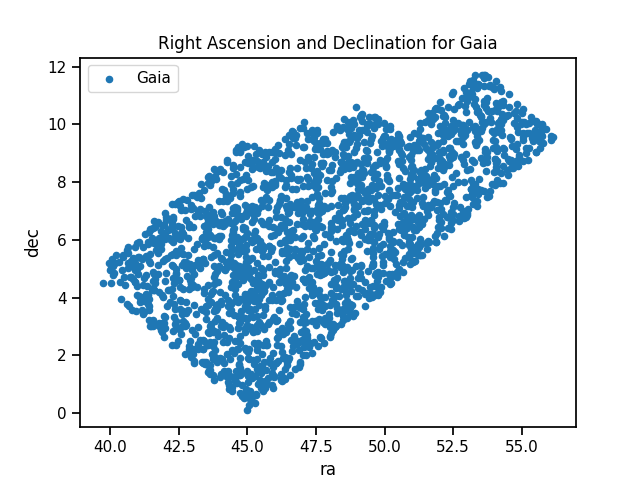

In [53]:
gaia_df_3.plot('ra', 'dec', kind='scatter', label='Gaia', title='Right Ascension and Declination for Gaia');

<IPython.core.display.Javascript object>


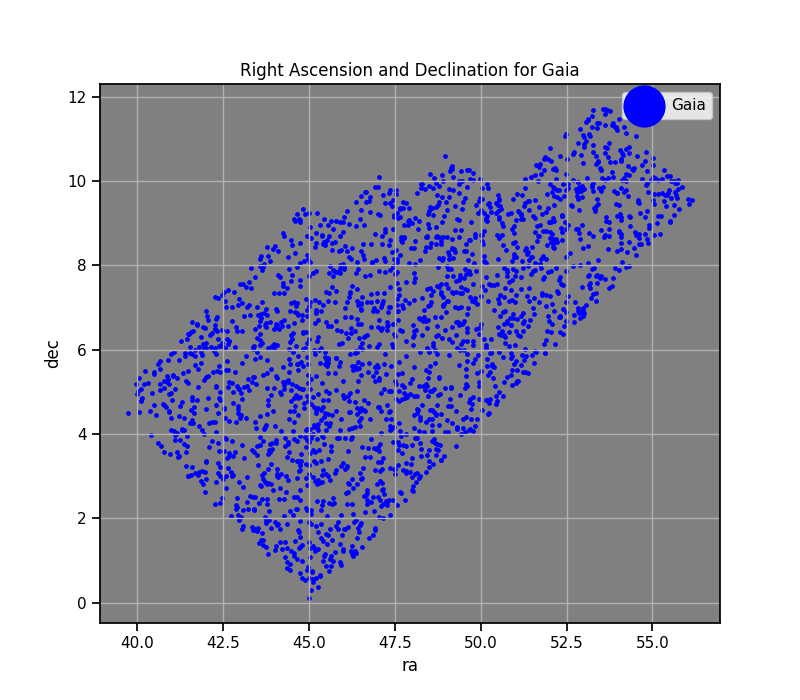

In [54]:
# More control use an external fig and ax.
fig, ax = plt.subplots( figsize=(8,7) )
gaia_df_3.plot('ra', 'dec', kind='scatter', label='Gaia', marker='o', s=6, color='blue', ax=ax, fig=fig)
ax.set_title('Right Ascension and Declination for Gaia')
ax.set_facecolor('grey')
ax.legend( markerscale = 12 )
ax.grid(True)
# plt.savefig('somename.png')
plt.show()
# Colors not recommended.

Or even __Scatterplot Matrices__:

<IPython.core.display.Javascript object>


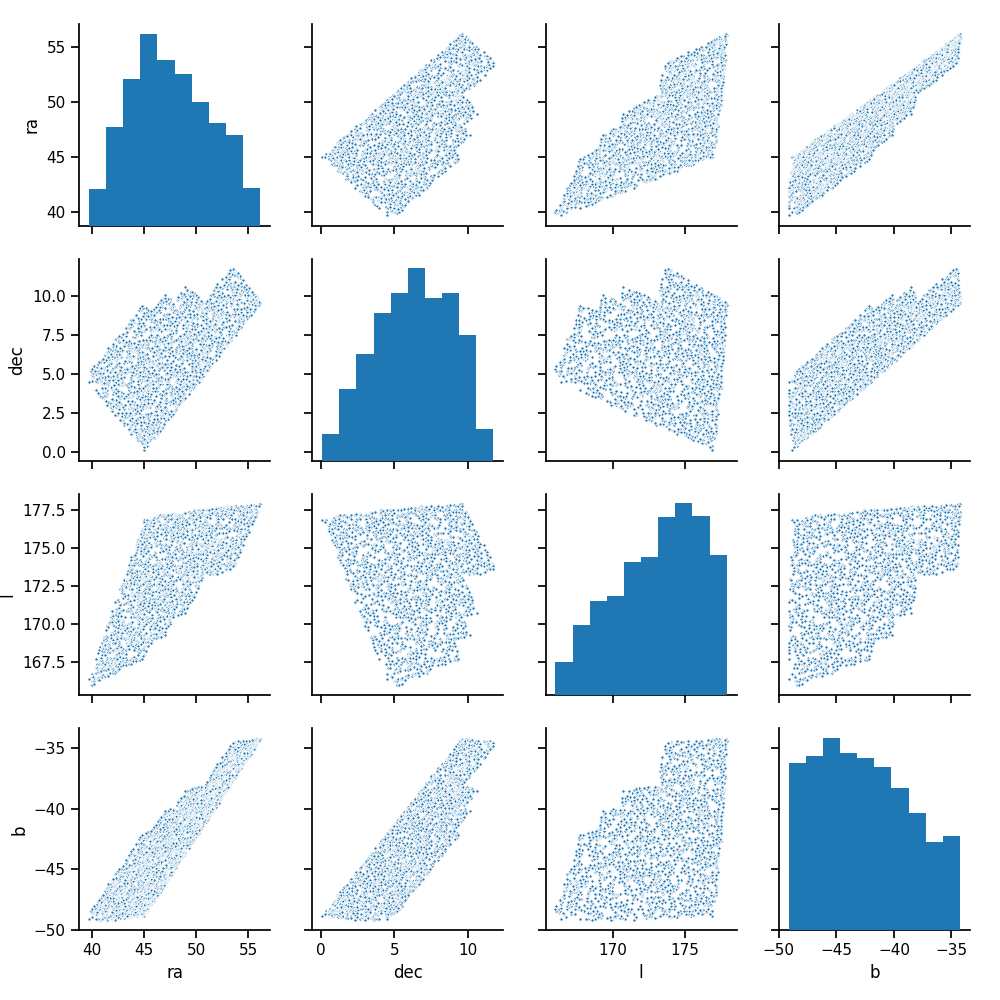

In [55]:
sns.pairplot(gaia_df_3, plot_kws={"s": 6} )
# Plot pairwise relationships in a dataset.  Diagonals seem to be historgrams, ra vs ra.
plt.show()

<IPython.core.display.Javascript object>


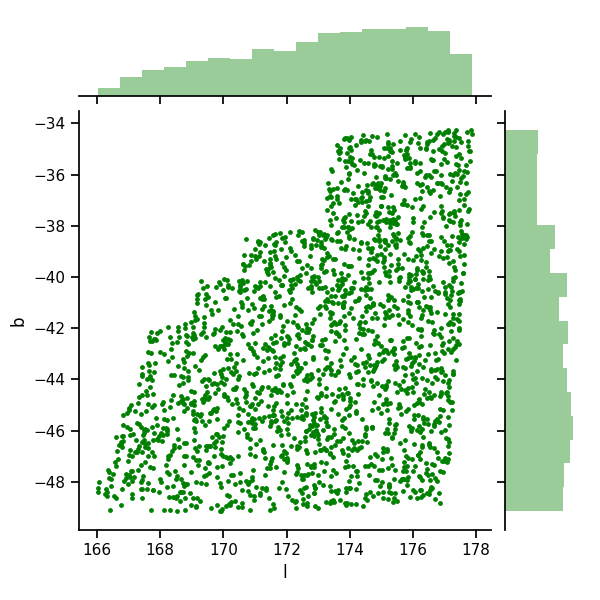

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [56]:
sns.jointplot('l', 'b', gaia_df_3, color='green', s=6);

# Indexing, Selecting, Filtering Data

Now I want to filter the data based on __ra__ and __dec__:

I want to select all the stars within:
- 45 < RA < 50
- 5 < Dec < 10

Normally, you would could do in numpy using the __`np.where`__ function, like in the following example:

In [57]:
ra_arr = gaia_df.ra.values
dec_arr = gaia_df.dec.values

In [58]:
# Just showing the first 25 elements
np.column_stack((ra_arr, dec_arr))[0:15]

array([[4.49961522e+01, 5.61634775e-03],
       [4.50049701e+01, 1.98746513e-02],
       [4.50043123e+01, 2.10424715e-02],
       [4.49950374e+01, 3.81519670e-02],
       [4.49638922e+01, 4.35964570e-02],
       [4.49983264e+01, 6.63346354e-02],
       [4.50482820e+01, 4.82585916e-02],
       [4.50236165e+01, 6.84211252e-02],
       [4.50267273e+01, 8.17017400e-02],
       [4.49665454e+01, 4.63102291e-02],
       [4.49932711e+01, 7.63359005e-02],
       [4.49690763e+01, 8.44258917e-02],
       [4.49784589e+01, 9.25808117e-02],
       [4.49328009e+01, 6.48117207e-02],
       [4.49526503e+01, 8.49519208e-02]])

In [59]:
## Numpy way of finding the stars that meet the criteria
# RA critera, find the indices where true...
ra_idx = np.where((ra_arr >= 45) & (ra_arr <= 50))[0]
# Dec criteria
dec_idx = np.where((dec_arr >= 5) & (dec_arr <= 10))[0]
# Finding `intersecting' indices that meet both criteria
radec_idx = np.intersect1d(ra_idx, dec_idx)
# Selecting the values from only those indices
ra_new = ra_arr[radec_idx]
dec_new = dec_arr[radec_idx]
# Printing out ra and dec for corresponding indices
print(np.column_stack((ra_new, dec_new)))

[[49.64774675  5.00280731]
 [49.63224857  5.0081667 ]
 [49.58879967  5.00074408]
 ...
 [45.85703513  9.13276023]
 [45.84518961  9.14328854]
 [45.84514856  9.14476464]]


This is rather convoluted and __long__, and one can easily make a mistake if s/he doesn't keep track of which arrays s/he is using!

In Pandas, this is __much easier!!__

In [60]:
gaia_df_4 = gaia_df.loc[(
                (gaia_df.ra >= 45) & (gaia_df.ra <= 50) &
                (gaia_df.dec >= 5) & (gaia_df.dec <= 10))]
gaia_df_4[['ra','dec']]

,astrometric_n_bad_obs_al,astrometric_n_good_obs_al
43777,49.647747,5.002807
43778,49.632249,5.008167
43779,49.588800,5.000744
43780,49.583936,5.015898
43781,49.606410,5.014561
43782,49.626470,5.031774
43784,49.548174,5.000879
43785,49.556817,5.005441
43786,49.545010,5.014518
43787,49.553024,5.020243


# <span style="color:red">Future of Pandas </span>
Pandas is a __great__ for handling data, especially comma-delimited or space-separated data. Pandas is also compatible with many other packages, like __seaborn__, __astropy__, NumPy, etc.

We will have another lecture on Pandas that will cover much more advanced aspects of Pandas. __Make sure you keep checking the schedule!__

# <span style="color:blue">Resources </span>
- [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
- [Datacamp Pandas Tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Top 8 resources for learning data analysis with pandas](http://www.dataschool.io/best-python-pandas-resources/)